In [2]:
import numpy as np
from bagpy import bagreader
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from pyproj import Proj, transform
from scipy.spatial.transform import Rotation as R
from scipy.integrate import cumtrapz
from scipy.signal import butter
from scipy.signal import butter, filtfilt, detrend

In [3]:
data_driving = bagreader("2023-10-19-14-14-38-filtered.bag")

[INFO]  Data folder 2023-10-19-14-14-38-filtered already exists. Not creating.


In [4]:
data_imu = data_driving.message_by_topic("/imu/imu_uncompensated")
data_gps = data_driving.message_by_topic("/gps/fix")

In [3]:
gps = pd.read_csv(data_gps)
imu = pd.read_csv(data_imu)

In [4]:
imu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.697739e+09,74256,1697739278,738179357,imu,-0.000206,-0.027338,-0.000407,0.999626,0.0,...,-9.556563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.697739e+09,74257,1697739278,743177357,imu,-0.000202,-0.027337,-0.000405,0.999626,0.0,...,-9.546851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.697739e+09,74258,1697739278,748176357,imu,-0.000201,-0.027341,-0.000407,0.999626,0.0,...,-9.522068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.697739e+09,74259,1697739278,753176357,imu,-0.000200,-0.027338,-0.000407,0.999626,0.0,...,-9.531379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.697739e+09,74260,1697739278,758176357,imu,-0.000199,-0.027335,-0.000410,0.999626,0.0,...,-9.534050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616317,1.697742e+09,690700,1697742360,958177357,imu,-0.000923,-0.027868,0.001675,0.999610,0.0,...,-9.601021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616318,1.697742e+09,690701,1697742360,963177357,imu,-0.000923,-0.027881,0.001671,0.999609,0.0,...,-9.469069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616319,1.697742e+09,690702,1697742360,968176357,imu,-0.000920,-0.027876,0.001672,0.999610,0.0,...,-9.416674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616320,1.697742e+09,690703,1697742360,973177357,imu,-0.000920,-0.027867,0.001675,0.999610,0.0,...,-9.477226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
gps

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,status.status,status.service,latitude,longitude,altitude,position_covariance_0,position_covariance_1,position_covariance_2,position_covariance_3,position_covariance_4,position_covariance_5,position_covariance_6,position_covariance_7,position_covariance_8,position_covariance_type
0,1.697739e+09,322,1697739278,761564970,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
1,1.697739e+09,323,1697739278,861115217,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
2,1.697739e+09,324,1697739278,961461782,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
3,1.697739e+09,325,1697739279,61564683,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
4,1.697739e+09,326,1697739279,162702798,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30753,1.697742e+09,31075,1697742360,525730848,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
30754,1.697742e+09,31076,1697742360,631426572,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
30755,1.697742e+09,31077,1697742360,725946426,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0
30756,1.697742e+09,31078,1697742360,825489997,gps,-1,1,NaN,NaN,NaN,9.998000e+15,0.0,0.0,0.0,9.998000e+15,0.0,0.0,0.0,1.599680e+17,0


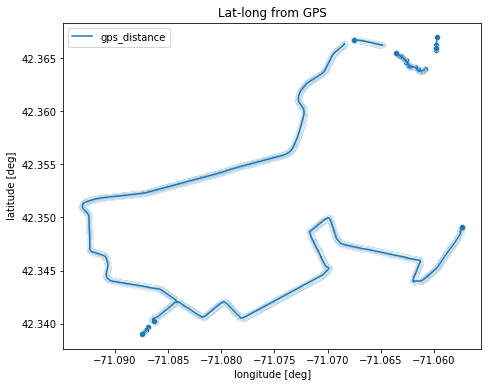

In [6]:
dist_y = gps['latitude']
dist_x = gps['longitude']
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
seaborn.scatterplot(y = dist_y,x = dist_x)
plt.plot(dist_x,dist_y,label = 'gps_distance')
ax.set_xlabel('longitude [deg]')
ax.set_ylabel('latitude [deg]')
plt.axis('scaled')
plt.title("Lat-long from GPS")
plt.legend()


In [7]:
def converttoUTM(gps):
    c = 0
    utmX = []
    utmY = []
    lat = gps['latitude']
    long = gps['longitude']
    myProj = Proj(proj='utm', zone="19", ellps='WGS84')
    for i in range(len(lat)):
        if np.isnan(lat[i]) != True:
            utmx,utmy = myProj(long[i],lat[i])
            if c == 0:
                iniX = utmx
                iniY = utmy
                c +=1
            utmX.append(utmx-iniX)
            utmY.append(utmy-iniY)
        else:
            utmX.append(long[i])
            utmY.append(lat[i])
    # print(self.utmX[0],self.utmY[0])
    return np.array(utmX),np.array(utmY)

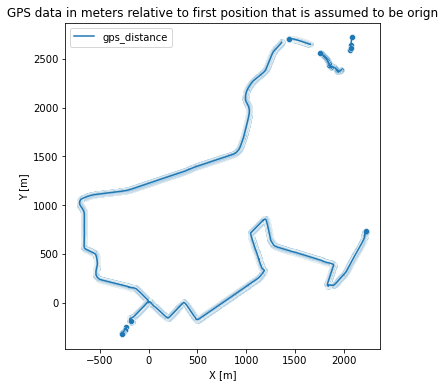

In [8]:
dist_x,dist_y = converttoUTM(gps)
# print(ndist_x[0])
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
seaborn.scatterplot(y = dist_y,x = dist_x)
plt.plot(dist_x,dist_y,label = 'gps_distance')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.axis('scaled')
plt.title("GPS data in meters relative to first position that is assumed to be orign")
plt.legend()


In [9]:
def quaternionToEuler(X, Y, Z, W):
    yaw = []
    for x,y,z,w in zip(X,Y,Z,W):
        r = R.from_quat([x, y, z, w])
        euler = r.as_euler('xyz')  # Assuming ZYX Euler angles
        yaw.append(euler[2])
    return  yaw # Extracting the third element (yaw/theta)

In [10]:
# for i in range(len(imu["linear_acceleration.x"])):
#     if imu["linear_acceleration.x"][i]>0:
#         print(i)
(imu["header.stamp.secs"][54700] - gps["header.stamp.secs"][2735])
# imu["linear_acceleration.x"][547]

0

In [11]:
yaw = quaternionToEuler(imu["orientation.x"],imu["orientation.y"],imu["orientation.z"],imu["orientation.w"])
ts = imu["header.stamp.secs"] - imu["header.stamp.secs"][0]

In [12]:
yaw = np.array(yaw)
yaw_bais = np.average(yaw[:54700])
yaw = yaw - yaw_bais
print(yaw_bais)

0.04932929330371348


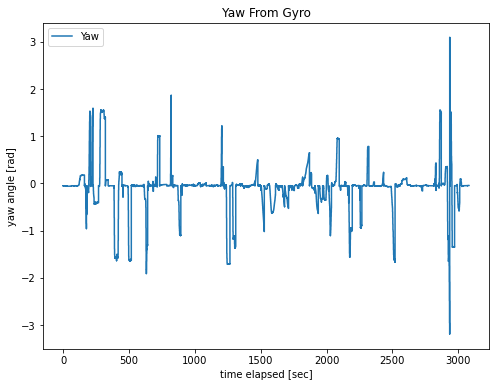

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plt.plot(ts,yaw,label = "Yaw")
ax.set_xlabel('time elapsed [sec]')
ax.set_ylabel('yaw angle [rad]')
plt.title("Yaw From Gyro")
plt.legend()


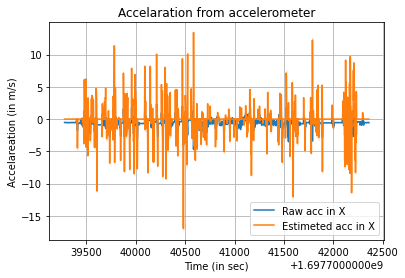

In [315]:
# acc_x = imu['linear_acceleration.x'][:54700].to_numpy()
# acc_x_bais = np.average(acc_x)
# acc_x = imu['linear_acceleration.x'] - acc_x_bais
# print(acc_x_bais)
fs =20

forward_accc = imu['linear_acceleration.x'].to_numpy()
lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
forward_acc = filtfilt(b, a, forward_accc)
forward_acc = forward_acc*np.cos(yaw) + forward_acc*np.sin(yaw)

new_forward_acc = forward_acc.copy()

#high_pass yaw_rate/gyro
hp_fc = 0.001
order = 4
nyq = 0.5 * fs
hp_fc_norm = hp_fc / nyq
b, a = butter(order, hp_fc_norm, btype='highpass')
new_forward_acc = filtfilt(b, a, forward_acc)

new_forward_acc = detrend(new_forward_acc)

new_forward_acc = new_forward_acc - new_forward_acc[0]
new_forward_acc = [0 if np.abs(i)<0.7 else i for i in new_forward_acc]
new_forward_acc = [x*3.6 for x in new_forward_acc]

seaborn.lineplot(y = forward_accc,x = imu["header.stamp.secs"], label = 'Raw acc in X')
seaborn.lineplot(y = new_forward_acc,x = imu["header.stamp.secs"], label = 'Estimeted acc in X')


plt.xlabel('Time (in sec)')
plt.title("Accelaration from accelerometer")
plt.ylabel("Accelareation (in m/s)")
plt.grid()

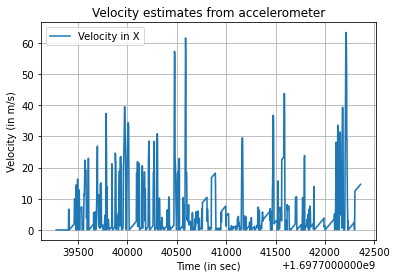

In [316]:



def velocity(acc):
    delta_t = (imu["header.stamp.nsecs"][1] - imu["header.stamp.nsecs"][0])/ 10_000_000_000
    velocity_x = np.cumsum(acc) * delta_t
    return velocity_x

# velocity_x = velocity(new_forward_acc)
# detrend_vel = detrend(velocity_x)

forward_vel_after = np.zeros_like(new_forward_acc)
forward_vel_after[0] = new_forward_acc[0]
forward_vel_after[1:] = cumtrapz(new_forward_acc, dx = 1/200)

detrend_vel = detrend(forward_vel_after)
forward_vel_final = forward_vel_after
forward_vel_final = detrend_vel.copy()

scale = np.ones_like(forward_vel_final)

diff_acc = np.diff(new_forward_acc)

slope_threshold = 0.01
window_size = 500
zero_slope_windows = []

for i in range(len(new_forward_acc)-window_size):
    window_diff = diff_acc[i:i+window_size]
    if np.all(np.abs(window_diff) < slope_threshold):
        zero_slope_windows.append((i, i+window_size))


for window in zero_slope_windows:
    scale[window[0]:window[1]] = 0

begin = 0 
end = 0
for i in range(len(scale)):
    if(scale[i] == 1):
        end = i 
    else:
        if end > begin:
            min = np.min(forward_vel_final[begin:end])
            forward_vel_final[begin-1:end] = forward_vel_final[begin-1:end] - min
            begin = i

# # forward_vel_final = forward_vel_final - 1.5

# forward_vel_final[scale == 0] = 0
forward_vel_final[forward_vel_final < 0] = 0
# forward_vel_final = forward_vel_final * 3.6



seaborn.lineplot(y = forward_vel_final,x = imu["header.stamp.secs"], label = 'Velocity in X')
plt.xlabel('Time (in sec)')
plt.title("Velocity estimates from accelerometer")
plt.ylabel("Velocity (in m/s)")
plt.grid()

-0.03627881209282592


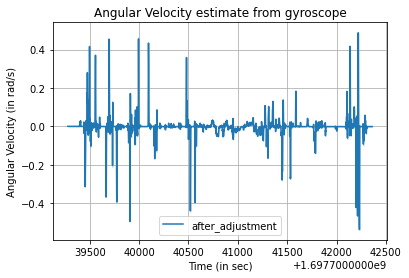

In [86]:
yaw_rate = imu["angular_velocity.z"][:2735].to_numpy()
yaw_rate_bais = np.average(yaw_rate)
yaw_rate = imu["angular_velocity.z"] - yaw_rate_bais
print(yaw_rate_bais)
seaborn.lineplot(y = yaw_rate,x = imu["header.stamp.secs"], label = 'after_adjustment')


plt.xlabel('Time (in sec)')
plt.title("Angular Velocity estimate from gyroscope")
plt.ylabel("Angular Velocity (in rad/s)")
plt.grid()

In [317]:
# Dead reckoning 

xf = 0
yf = 0
thetaf = 0
X_imu = []
Y_imu = []
Theta_imu = []

for i in range(len(forward_vel_final)):
    v = forward_vel_final[i]
    theta = yaw_rate[i]
    dt = (imu["header.stamp.nsecs"][1] - imu["header.stamp.nsecs"][0])/ 1_000_000_000
    x0 = xf
    y0 = yf
    theta0 = thetaf
    if theta == 0:
        xf = x0 + v*dt*np.cos(theta0)
        yf = y0 + v*dt*np.sin(theta0)
        thetaf = theta0
        X_imu.append(xf)
        Y_imu.append(yf)
        Theta_imu.append(thetaf)
    else:
        xf = x0 + v*(np.sin(theta0+theta*dt) - np.sin(theta0))/theta
        yf = y0 + v*(np.cos(theta0) - np.cos(theta0+theta*dt))/theta
        thetaf = theta0 + theta*dt
        X_imu.append(xf)
        Y_imu.append(yf)
        Theta_imu.append(thetaf)

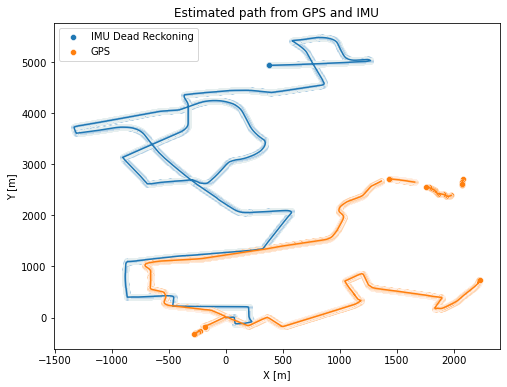

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
seaborn.scatterplot(y = Y_imu,x = X_imu,label = 'IMU Dead Reckoning')
plt.plot(X_imu,Y_imu)
seaborn.scatterplot(y = dist_y,x = dist_x,label = 'GPS')
plt.plot(dist_x,dist_y)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.title("Estimated path from GPS and IMU")
# plt.axis('scaled')
plt.legend()

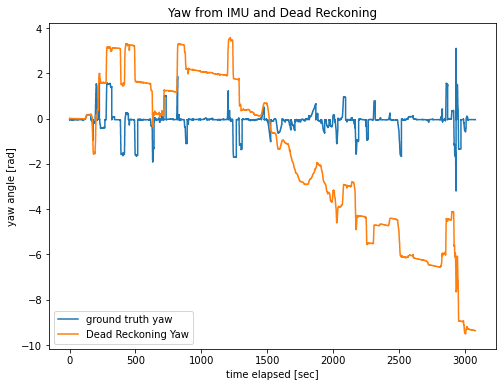

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(ts,yaw,label = "ground truth yaw")
plt.plot(ts,Theta_imu,label = "Dead Reckoning Yaw")
ax.set_xlabel('time elapsed [sec]')
ax.set_ylabel('yaw angle [rad]')
plt.title("Yaw from IMU and Dead Reckoning")
plt.legend()

In [19]:
from numpy import dot, sum, tile, linalg 
from numpy.linalg import inv 
class Kalman_filter():
    def __init__(self,X,P):
        self.X = X
        self.P = P
        self.K = 0
    def predict(self, A, Q, B, U):
        self.X = dot(A, self.X) + dot(B, U)     
        self.P = dot(A, dot(P, A.T)) + Q     
        return(self.X,self.P)   
    
    def update(self, Y, H, R):     
        IM = dot(H, X)     
        IS = R + dot(H, dot(P, H.T))     
        self.K = dot(P, dot(H.T, inv(IS)))     
        self.X = self.X + dot(self.K, (Y-IM))     
        self.P = self.P - dot(self.K, dot(IS, self.K.T))         
        return (self.X,self.P,self.K)
  

In [373]:
from numpy.linalg import inv  


X_kf = []
Y_kf = []
Theta_kf = []

X_P = []
Y_P = []
Theta_P = []


#time step of mobile movement
dt = (imu["header.stamp.nsecs"][1] - imu["header.stamp.nsecs"][0])/ 1_000_000_000

# Initialization of state matrices 
X = np.array([0,0,0]) 
P = np.eye(3)*1e-4
my_kf = Kalman_filter(X,P)
A = np.array([[1,0,0],[0,1,0],[0,0,1]])
Q = np.eye(X.shape[0]) * 1e-4
R = np.eye(X.shape[0])* 1e-2
R_imu = np.array([[0.1]])
c = 0
k= 0 

# Applying the Kalman Filter 
for i in range(len(forward_vel_final)):
    v = forward_vel_final[i]
    theta = yaw_rate[i]
    time = imu["header.stamp.secs"][i]
    if theta == 0:
        B = np.array([dt*np.cos(X[2]),dt*np.sin(X[2]),0])
        U = np.array([v])
    else:  
        B = np.array([[(np.sin(X[2] + theta*dt)- np.sin(X[2]))/theta, 0 ], [(np.cos(X[2])- np.cos(X[2] + theta*dt))/theta, 0 ], [0, dt]])        
        U = np.array([v,theta])
    (X, P) = my_kf.predict(A, Q, B, U)
    
    
    if k < 30758:
        if c != 20:
            if np.isnan(dist_x[k]) == False and np.isnan(dist_y[k]) == False:        
                Y = np.array([dist_x[k], dist_y[k], yaw[i] ])
                H = np.array([[1, 0, 0],[0,1,0],[0,0,1]])
                (X, P, K) = my_kf.update(Y, H, R)
            else:
                Y_imuu = np.array([yaw[i] ])
                H_imuu = np.array([[0,0,1]])
                (X, P, K) = my_kf.update(Y_imuu, H_imuu, R_imu)
        if c == 20:
            if np.isnan(dist_x[k]) == False and np.isnan(dist_y[k]) == False:        
                Y = np.array([dist_x[k], dist_y[k], yaw[i] ])
                H = np.array([[0, 0, 0],[0,0,0],[0,0,1]])
                (X, P, K) = my_kf.update(Y, H, R)
            else:
                Y_imuu = np.array([yaw[i] ])
                H_imuu = np.array([[0,0,1]])
                (X, P, K) = my_kf.update(Y_imuu, H_imuu, R_imu)
            k += 1
            c = 0
    c +=1
    X_kf.append(my_kf.X[0])
    Y_kf.append(my_kf.X[1])
    Theta_kf.append(my_kf.X[2])
    
    X_P.append(my_kf.P[0,0])
    Y_P.append(my_kf.P[1,1])
    Theta_P.append(my_kf.P[2,2])
    

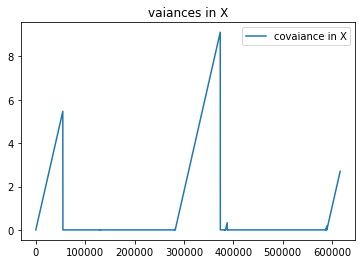

In [374]:
plt.plot(X_P,label="covaiance in X")
ax.set_xlabel('Time')
ax.set_ylabel('covariance [m]')
plt.title("vaiances in X")
plt.legend()

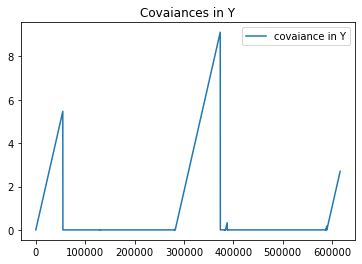

In [375]:
plt.plot(Y_P,label="covaiance in Y")
ax.set_xlabel('Time')
ax.set_ylabel('variance [m]')
plt.title("Covaiances in Y")
plt.legend()

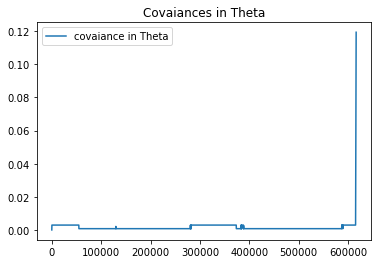

In [376]:
plt.plot(Theta_P,label="covaiance in Theta")
ax.set_xlabel('Time')
ax.set_ylabel('variance [rad]')
plt.title("Covaiances in Theta")
plt.legend()

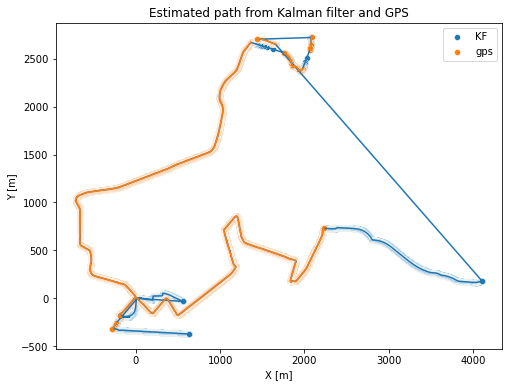

In [377]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
seaborn.scatterplot(y = Y_kf,x = X_kf, label = "KF")
plt.plot(X_kf,Y_kf)
seaborn.scatterplot(y = dist_y,x = dist_x, label = "gps")
plt.plot(dist_x,dist_y)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.title("Estimated path from Kalman filter and GPS")
plt.legend()

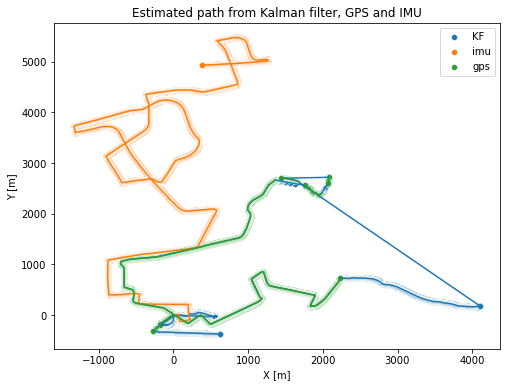

In [378]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
seaborn.scatterplot(y = Y_kf,x = X_kf, label = "KF")
plt.plot(X_kf,Y_kf)
seaborn.scatterplot(y = Y_imu,x = X_imu, label = "imu")
plt.plot(X_imu,Y_imu)
seaborn.scatterplot(y = dist_y,x = dist_x, label = "gps")
plt.plot(dist_x,dist_y)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.title("Estimated path from Kalman filter, GPS and IMU")
plt.legend()

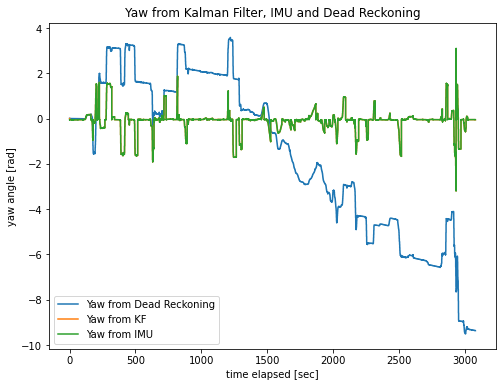

In [379]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(ts,Theta_imu,label = "Yaw from Dead Reckoning")
plt.plot(ts,Theta_kf,label = "Yaw from KF")
plt.plot(ts,yaw,label = "Yaw from IMU")
ax.set_xlabel('time elapsed [sec]')
ax.set_ylabel('yaw angle [rad]')
plt.title("Yaw from Kalman Filter, IMU and Dead Reckoning")
plt.legend()
